In [21]:
! pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import tensorflow as tf

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


In [23]:

print(x_train.shape)

(60000, 28, 28)


In [24]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  MaxPooling2D((2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.summary()

c:\Users\Vsaij\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8304 - loss: 0.4773 - val_accuracy: 0.8555 - val_loss: 0.3939
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8817 - loss: 0.3307 - val_accuracy: 0.8725 - val_loss: 0.3398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8962 - loss: 0.2881 - val_accuracy: 0.8889 - val_loss: 0.3135
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.9042 - loss: 0.2626 - val_accuracy: 0.8842 - val_loss: 0.3174
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9128 - loss: 0.2394 - val_accuracy: 0.9016 - val_loss: 0.2715


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("✅ Test Accuracy:", test_acc)


313/313 - 2s - 7ms/step - accuracy: 0.9016 - loss: 0.2715
✅ Test Accuracy: 0.9016000032424927


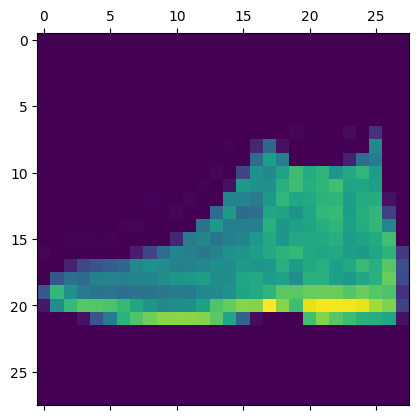

In [30]:
import matplotlib.pyplot as plt

plt.matshow(x_test[0])

In [31]:
prediction = model.predict(x_test)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([4.3465620e-06, 1.1026032e-09, 2.1327121e-07, 2.8386887e-07,
       4.4412740e-08, 6.5833805e-03, 3.1991263e-07, 4.2509576e-03,
       1.1557945e-04, 9.8904490e-01], dtype=float32)

In [33]:
import numpy as np

a = np.argmax(prediction[0])
print("Predicted class:", a)
print("True class:", y_test[0])

Predicted class: 9
True class: 9
